<a href="https://colab.research.google.com/github/crown3633/TaeHun/blob/master/Thermo_and_Fluid_Engineering_Lab_1_06_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy

## 선형대수 기본 연산

* scipy는 거의 항상 numpy와 같이 사용된다.
* 선형대수 연산을 지원하는 scipy.linalg 모듈을 불러온다

In [0]:
import numpy as np
from scipy.linalg import *      # 선형대수 라이브러리 

* 행렬은 np.array()함수를 활용한다.

In [0]:
arr = np.array([[1, 2],[3, 4]])
arr

array([[1, 2],
       [3, 4]])

* 행렬식의 계산은 det() 함수를 활용한다.

In [0]:
det(arr)

-2.0

* 역행렬은 inv()함수를 활용한다.

In [0]:
iarr = inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

* 행렬의 곱셈은 아래와 같이 작성한다
 * np.dot(A, B)

In [0]:
np.dot( arr, iarr )

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## 행렬로 연립방정식 풀이

* 아래의 연립방정식을 풀이한다.
\begin{equation}
3x + 2y = 2
\end{equation}
\begin{equation}
x - y = 4
\end{equation}
\begin{equation}
5y + z = -1
\end{equation}

In [0]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])      # 열벡터
x = solve(A, b)
x

array([ 2., -2.,  9.])

* 정답여부를 확인한다.

In [0]:
np.dot( A, x )

array([ 2.,  4., -1.])

## 비선형 방정식의 해 구하기

* 아래 방정식의 해를 구한다.
\begin{equation}
x = e^{-x}
\end{equation}

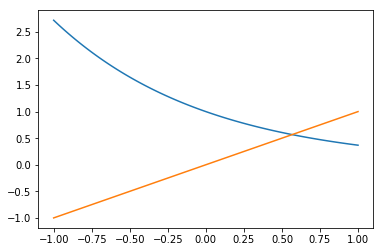

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
x = np.linspace(-1,1,101)   
y = np.exp( -x )
plt.plot( x, y )
plt.plot( x, x )
plt.show()

* 그래프를 통해서 보면 위와 같다.
* 0.5 근처에서 해가 존재함을 알 수 있다.

* 비선형 방정식을 풀기 위하여 scipy.optimize 모듈을 불러온다

In [0]:
from math import *                    # 일반적인 수학 함수를 사용하려면 필요하다.
from scipy.optimize import fsolve     # fsolve( ) 함수를 도입한다.

* 방정식을 f(x) = 0 형태로 하여 함수로 정의한다.

In [0]:
def f(x):
    return x - exp(-x) #수치해석 사용하려면 함수 꼴로 > f=0꼴로

* 해를 구한다.
* fsolve(함수, 초기값)

In [0]:
fsolve( f, 0.5 )

array([0.56714329])

## 함수의 최소값

* scipt.optimize모듈의 fmin_bfgz()함수로 최소값을 구한다.

In [0]:
from scipy.optimize import fmin_bfgs

* 아래 식의 최소값을 구한다.
\begin{equation}
f(x) = x^2 + 10sin(x)
\end{equation}
* 파이썬 함수로 정의한 후 함수의 형태를 그래프로 그려본다.

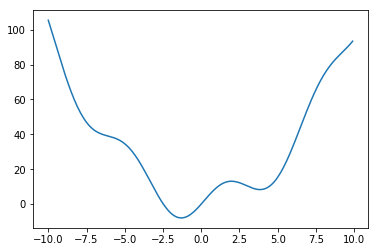

In [0]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

* fmin_bfgs()함수의 인자로 최소화할 함수의 이름과 x의 시작점을 넘겨준다.

In [0]:
fmin_bfgs( f, -2.5)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 4
         Function evaluations: 15
         Gradient evaluations: 5


array([-1.30644068])

* fmin_bfgs() 함수는 국부 최소점을 찾는 기능만 있으므로, 초기값에 따라 결과가 달라질 수 있다.
* x=3을 시작점으로 하면 아래와 같다.

In [0]:
fmin_bfgs( f, 3 )

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


array([3.83746709])

## 수치 적분

* scipy.integrate 모듈의 quad() 함수를 이용하여 수치 적분을 계산한다.
* 아래 정적분을 계산한다.
\begin{equation}
\int_{0}^{1}x^2dx
\end{equation}

In [0]:
from scipy.integrate import quad
def f(x):
    return x*x
quad( f, 0, 1 ) #적분하는 함수

(0.33333333333333337, 3.700743415417189e-15)

* 첫번째 반환값이 수치적분의 결과값
* 두번째 반환값은 추정오차이다.

* 피적분 함수를 numpy를 함수를 활용한 수학식으로 표현할 수 있다.
* exp(-x)를 0부터 무한대까지 적분하는 코드는 아래와 같다.

In [0]:
def f(x):
    return np.exp(-x)
F, err = quad( f, 0, np.inf )
print(F)

1.0000000000000002


## 선형 회귀법: 최소제곱법

* scipy.stats 모듈의 linregress(x, y)함수를 사용하여 회귀 직선의 기울기와 절편을 구할 수 있따.

In [0]:
import numpy as np
from scipy.stats import linregress

x = np.linspace(0, 4, 5)
y = [ 0, 2.1, 4.2, 5.9, 8.3 ] 
slope, intercept, r_value, p_value, std_err = linregress(x, y)

print("slope = %8.3f" % slope)
print("intercept = %8.3f" % intercept)

slope =    2.040
intercept =    0.020


* 회귀 직선과 데이터를 그려서 비교한다.

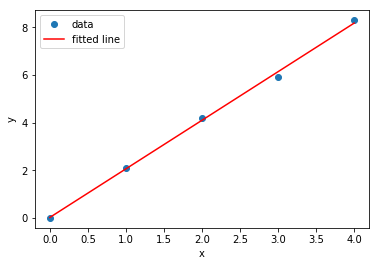

In [0]:
yfit = intercept + slope * x  

plt.plot(x, y, 'o', label='data')
plt.plot(x, yfit, 'r', label='fitted line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 비선형 회귀법: Levenberg-Marquardt 알고리즘

* 아래 주어진 데이터를 비선형 회귀법으로 얻는 예제이다.

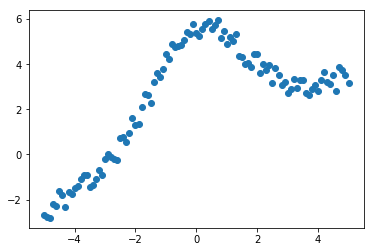

In [0]:
ndata = 101

x = np.linspace(-5,5,ndata)
y = 0.6*x + 5* np.exp(-0.2* x**2 ) + np.random.rand(ndata) 
plt.plot(x,y,'o')

* Levenberg-Marquardt 알고리즘을 사용하여 최적의 곡선을 구한다.
* scipy.optimize 모듈의 curve_fit()함수를 이용한다.
* 원하는 형태의 곡선에 대한 수식을 함수로 정의한다.
* 함수의 수식을 표현할 떄, numpy 함수를 사용한다.
\begin{equation}
y = a x + b e^{-c  x^2}
\end{equation}
* 위와 같이 가정하며, a, b, c는 비선형 회귀에 의해 결정될 값이다.

In [0]:
# non-linear least square method using Levenberg-Marquardt algorithm  
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x + b*np.exp(-c* x**2 )   

* 변수의 초기값을 설정하고 curve_fit 함수를 호출한다.
* 첫번째로 반환되는 변수 popt가 최적화된 변수에 대한 리스트이다.

In [0]:
p0ini = [0, 0, 0]            # initial values of parameters for fitting function
popt, pcov = curve_fit( func, x, y, p0 = p0ini )      

print( popt )

[0.60078127 5.41484702 0.1521824 ]


* 구해진 변수로 최적화된 곡선을 예측하고, 원래의 데이터와 비교한다.

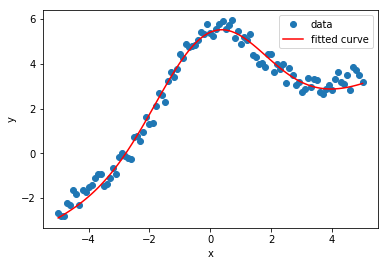

In [0]:
yfit = func( x, *popt )       # 매개변수를 함수의 인자 a, b, c 로 전달하여 계산한다.

plt.plot( x, y, 'o', label='data')
plt.plot( x, yfit, 'r', label='fitted curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 상미분 방정식: 초기값 문제

* scipy.integrate 모듈의 solve_ivp() 함수를 이용하여 상미분방정식의 초기값문제에 대한 수치해를 얻을 수 있다.

In [0]:
from scipy.integrate import solve_ivp

* 아래와 같은 일계 상미분방정식의 수치해를 구하는 경우를 실습한다.
\begin{equation}
\frac{dy}{dt}=0.5y
\end{equation}
* 도함수를 함수 형식으로 정의한다.

In [0]:
def dydt(t, y) : 
    return -0.5 * y #함수꼴 만들어주어야하는데(f=0) dydt는 안써도됨

* 초기값 y(0) = 1 에 대하여, t = 10까지 수치해를 구한다.

In [0]:
t0 = 0
tend = 10
y0 = 1

sol = solve_ivp( dydt, (t0, tend), (y0,), t_eval=np.linspace(t0,tend,21) ) #초기값 t, t의 범위 설정해주어야 함

* 초기값이 하나인 경우에도 입력 인자는 튜플이다.
* 인자 t_eval은 선택사항으로, 수치해가 계산될 t의 간격을 명시할 수 있다.
* 결과가 반환된 변수 sol에서 y와 방정식의 해 y는 아래와 같이 얻어진다.

In [0]:
sol.t

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [0]:
sol.y

array([[1.        , 0.77877121, 0.60652683, 0.47231798, 0.36766997,
        0.28642722, 0.22325718, 0.17381699, 0.13533366, 0.10546992,
        0.08217585, 0.06396748, 0.04982315, 0.03883629, 0.03024224,
        0.0235437 , 0.01834532, 0.01429687, 0.01113201, 0.00867035,
        0.0067547 ]])

* 결과를 그래프로 그린다.
* sol.y는 2차원 배열이므로 첫번째 행을 인자로 넣는다.

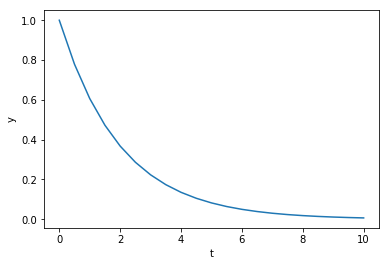

In [0]:
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## 이계 상미분방정식

* 아래 이계 미분방정식을 푸는 예제이다.
\begin{equation}
y''+2y'+2y=cos(2t)
\end{equation}
\begin{equation}
y(0) = 0
\end{equation}
\begin{equation}
 y'(0) = 0
\end{equation}
* 이계 미분방정식은 연립 일계 미분방정식으로 변환할 수 있다.
 * 아래와 같이 치환하도록 한다.
 \begin{equation}
v(t) = y'(t)
\end{equation} 
 * 최종적으로 아래와 같이 바꿀 수 있다.
\begin{equation}
v' + 2v + 2y = cos(2)
\end{equation}
\begin{equation}y(0) = 0
\end{equation}
\begin{equation}v(0) = 0
\end{equation}

In [0]:
def dYdt( t, Y ) :                              # Y[0] = y(t), Y[1] = v(t)
    return  Y[1], -2*Y[1]-2*Y[0]+np.cos(2*t)    # y'(t), v'(t)

# 초기값
Y0 = ( 0, 0 )      # y(0)  v(0)

t0 = 0
tend = 10

sol = solve_ivp( dYdt, (t0, tend), Y0, t_eval=np.linspace(t0,tend,101) )

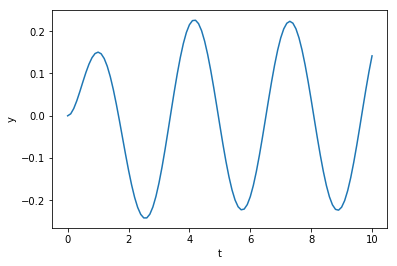

In [0]:
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# 과제
## 6번
* 파일 - 새 Python3 노트를 통해 새 노트북을 만드시오.
* 아래 작성된 코드 셀을 복사한 후 ## FIXME ## 부분을 수정하여 감쇠진동 상미분방정식의 그래프를 plot하시오.
* 파일 - Github에 사본 저장을 통해 1번 과제에서 복사한 저장소에 아래와 같은 이름으로 저장하시오.
 * 열유체공학실험-2016201278-HW06
 * 다른 제목인 경우 미제출 처리 될 수 있음.

* 감쇠진동 상미분방정식

\begin{equation}
4x'' + 1x' + 4x = 0
\end{equation}
\begin{equation}
x(0) = 0
\end{equation}
\begin{equation}
x'(0) = 0
\end{equation}
 * 위와 같을 떄 t = 0부터 t = 20까지의 위치를 그래프로 그리시오.

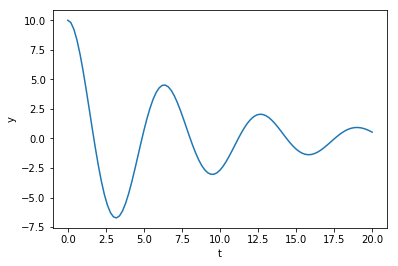

In [0]:
'''
* 감쇠진동 상미분방정식
 * 4x'' + 1x' + 4x = 0
 * x(0) = 10
 * x'(0) = 0
* 위와 같을 때 t = 0부터 t = 20까지의 위치를 그래프로 그리시오.
'''

def dXdt( t, X ) :                              
    return X[1], -0.25*X[1]-X[0]  ## FIXME ##

# 초기값
X0 = ( 10, 0 ) 

t0 = 0
tend = 20

sol = solve_ivp( dXdt, (t0, tend), X0, t_eval=np.linspace(t0,tend,101) )
plt.plot( sol.t, sol.y[0] )
plt.xlabel('t')
plt.ylabel('y')
plt.show()